# TABLERO DE CONTROL

El objetivo de este notebook es visualizar y poder manipular los datos obtenidos a partir de ciertas métricas para apoyar la toma de decisiones.
Para obtener dichos datos basta utilizar la función **get_dataframe**, la cual ya tiene contempladas ciertas métricas.

In [1]:
from queries import get_dataframe

conexión a Postgres exitosa


La métrica que se desee utilizar es la que se debe ingresar como parámetro de la función **get_dataframe**. Por ejemplo, las métricas requeridas en este ejercicio son el monto colocado y el número de transacciones. Para obtener estos datos, basta ingresar los parámetros *monto_acumulado* o *numero_transacciones*

## Monto colocado
En este caso se muestran el monto colocado por día, es decir, la suma de las transacciones realizadas en un día en particular

In [2]:
monto = get_dataframe('monto_colocado')
monto.head() # permite ver los 5 días con las transacciones más altas

,transaction_date,monto_colocado
0,2019-07-25,2193841.14
1,2019-07-31,1902913.10
2,2019-07-24,1874065.05
3,2019-07-27,1825156.73
4,2019-07-01,1750215.66


## Número de transacciones
Muestra el número total de transacciones. En este caso, 8322 transacciones.

In [3]:
num_trans = get_dataframe('numero_transacciones')
num_trans

,count
0,8322


## Métricas propuestas
Las métricas propuestas son la suma de las transacciones individuales por cliente, la suma de los cargos por retraso por cliente y la transferencia total realizada a un distribuidor.

Las razones para proponer estas métricas son las siguientes:

Con la suma de transacciones por clientes permite saber si clientes regulares con transacciones altas puede ser potenciales clientes clave o si las transacciones de clientes clave han disminuido.

Conocer los cargos totales por retraso permite saber que a que clientes se les hacen los mayores cargos por retraso, y ofrecerles una reestructuración de deuda u ofrecerles mayor flexibilidad dependiendo del tipo de cliente.

La última métrica permite conocer cuales son los distribuidores que reciben las transacciones más grandes y a los cuales se les pueden ofrecer recompensas, descuentos, así como optimizar recursos.

## Transacciones por cliente

In [4]:
clientes = get_dataframe('transacciones_por_cliente')
clientes.head()

,customer_id,total_transaction,customer_category
0,104503,363058.90,Key
1,186171,323326.44,Key
2,430695,315580.00,Key
3,427121,289441.58,Key
4,438341,212377.25,Key


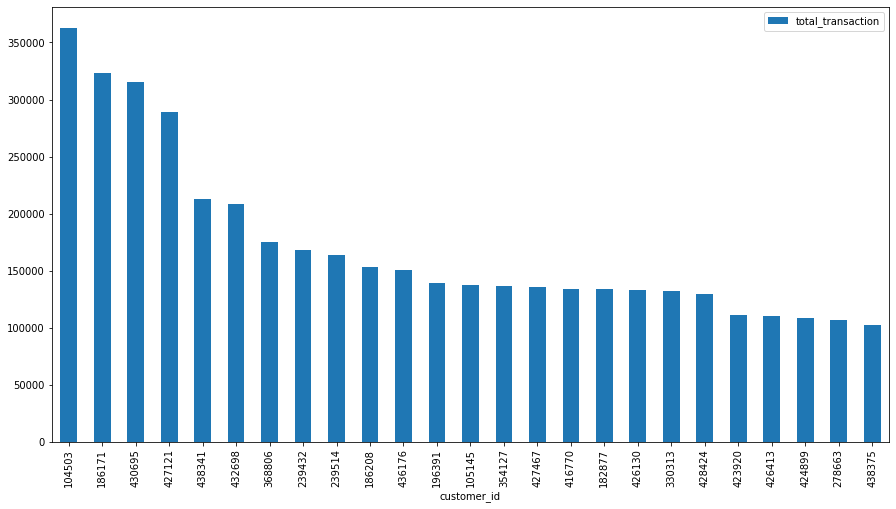

In [6]:
clientes.plot(x='customer_id', y='total_transaction', kind='bar', figsize=(15,8));

## Cargos por retraso

In [7]:
retrasos = get_dataframe("cargos_por_retraso")
retrasos.head()

,customer_id,total_overdue_fee
0,356511,3860.0
1,242081,3430.0
2,438394,3280.0
3,248528,2520.0
4,428286,2430.0


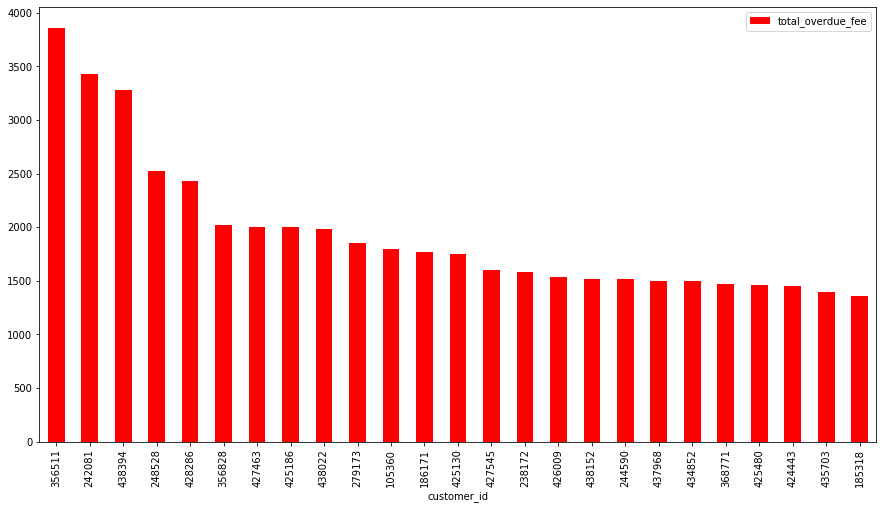

In [12]:
retrasos.plot(x='customer_id', y='total_overdue_fee', kind='bar', color='red', figsize=(15,8)); # muestra los 25 clientes con mayores cargos

## Transacciones por distribuidor

In [9]:
distribuidores = get_dataframe("transacciones_por_distribuidor")
distribuidores.head()

,distributor_name,distribution_center_name,total_transaction
0,DISTRIBUIDOR 2,CEDIS 9,3153196.36
1,DISTRIBUIDOR 2,CEDIS 2,2299815.92
2,DISTRIBUIDOR 2,CEDIS 16,2285493.71
3,DISTRIBUIDOR 2,CEDIS 21,2035019.04
4,DISTRIBUIDOR 2,CEDIS 8,1964849.53


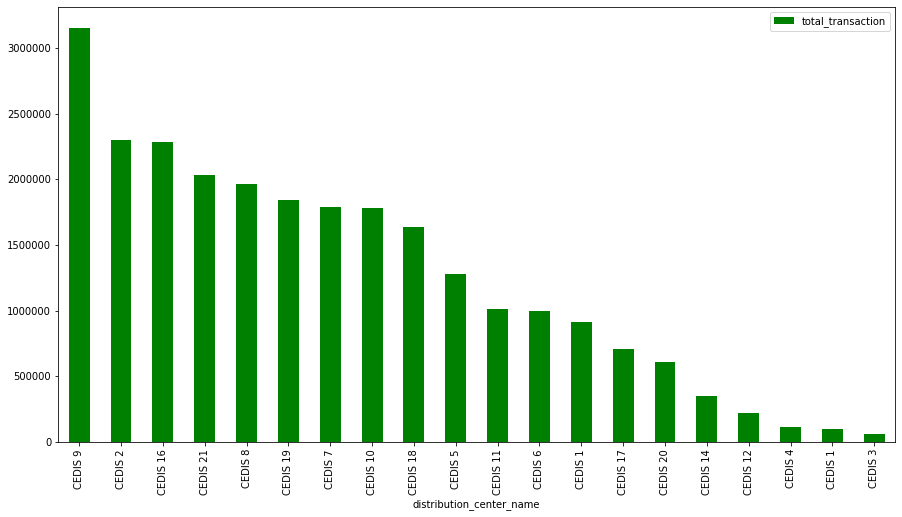

In [11]:
distribuidores.plot(x='distribution_center_name', y='total_transaction', kind='bar', color='green', figsize=(15,8));